<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/HW15_Logestic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/Logistic Regression/Smoking Data.csv'
df=pd.read_csv(path)
df.head(5)

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
df.shape

(1338, 6)

In [5]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

**Data Imbalance Check**

In [6]:

df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
yes = 1064/(1064+274)
yes


0.7952167414050823

In [8]:
no= 1-yes
no

0.20478325859491775

**Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])



In [11]:
df.head(3)

,region,age,sex,bmi,children,smoker
0,3,19,0,27.90,0,1
1,2,18,1,33.77,1,0
2,2,28,1,33.00,3,0


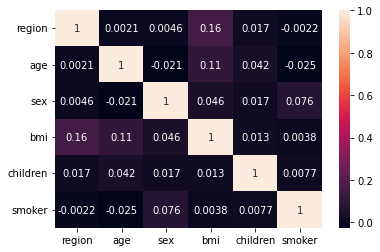

In [12]:
cr = sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(15,10)})

In [13]:
df.corr()

,region,age,sex,bmi,children,smoker
region,1.000000,0.002127,0.004588,0.157566,0.016569,-0.002181
age,0.002127,1.000000,-0.020856,0.109272,0.042469,-0.025019
sex,0.004588,-0.020856,1.000000,0.046371,0.017163,0.076185
bmi,0.157566,0.109272,0.046371,1.000000,0.012759,0.003750
children,0.016569,0.042469,0.017163,0.012759,1.000000,0.007673
smoker,-0.002181,-0.025019,0.076185,0.003750,0.007673,1.000000


In [14]:
df1=df.copy()
df1.head(5)

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [15]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler 
n= StandardScaler()
n

StandardScaler()

In [16]:
#Fitting multiple columns
x=['region', 'age', 'sex',	'bmi',	'children']
scaled1 = n.fit(df1[x])

In [17]:
df1.head(3)

,region,age,sex,bmi,children,smoker
0,3,19,0,27.90,0,1
1,2,18,1,33.77,1,0
2,2,28,1,33.00,3,0


In [18]:
#Transform multiple columns
df1[x]=n.transform(df1[x])

In [19]:
df1.head(3)

,region,age,sex,bmi,children,smoker
0,1.343905,-1.438764,-1.010519,-0.453320,-0.908614,1
1,0.438495,-1.509965,0.989591,0.509621,-0.078767,0
2,0.438495,-0.797954,0.989591,0.383307,1.580926,0


In [20]:
#Target
y=df1['smoker']
y.head(3)

0    1
1    0
2    0
Name: smoker, dtype: int64

In [21]:
#Features
X=df1.copy()
X=X.drop(['smoker'],axis=1)
X.head(3)

,region,age,sex,bmi,children
0,1.343905,-1.438764,-1.010519,-0.453320,-0.908614
1,0.438495,-1.509965,0.989591,0.509621,-0.078767
2,0.438495,-0.797954,0.989591,0.383307,1.580926


**Oversampling**

In [22]:
df1.shape

(1338, 6)

In [23]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=42)
X_os, y_os = over.fit_resample(X,y)

In [24]:
X.shape

(1338, 5)

In [25]:
X_os.shape


(2128, 5)

In [26]:
X_os.head(4)

,region,age,sex,bmi,children
0,1.343905,-1.438764,-1.010519,-0.453320,-0.908614
1,0.438495,-1.509965,0.989591,0.509621,-0.078767
2,0.438495,-0.797954,0.989591,0.383307,1.580926
3,-0.466915,-0.441948,0.989591,-1.305531,-0.908614


In [27]:
#Oversampling to remove imbalance
y_os.value_counts()

1    1064
0    1064
Name: smoker, dtype: int64

In [28]:
df1.head(3)

,region,age,sex,bmi,children,smoker
0,1.343905,-1.438764,-1.010519,-0.453320,-0.908614,1
1,0.438495,-1.509965,0.989591,0.509621,-0.078767,0
2,0.438495,-0.797954,0.989591,0.383307,1.580926,0


**Splitting Dataset**

In [29]:
from sklearn.model_selection import train_test_split
X_train_os,X_test_os,y_train_os, y_test_os =train_test_split(X_os,y_os, test_size=0.2, random_state=0) 

In [30]:
y_train_os.value_counts()

1    864
0    838
Name: smoker, dtype: int64

In [31]:
y_test_os.value_counts()

0    226
1    200
Name: smoker, dtype: int64

**Preparing ML Model with Logestic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_os,y_train_os)
y_pred_lr = lr.predict(X_test_os)

In [33]:
y_pred_lr

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [34]:
np.array(y_test_os)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

**Accuracy Check**

In [35]:
lr.score(X_test_os, y_test_os)

0.5774647887323944

**One Hot Encoder**

In [36]:
df=pd.read_csv(path)
df.head(5)

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [37]:
df2=df.copy()

In [38]:
df2.head(3)

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.90,0,yes
1,southeast,18,male,33.77,1,no
2,southeast,28,male,33.00,3,no


In [39]:
df2.shape

(1338, 6)

In [40]:
df2['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [41]:
columns=['region', 'sex']
for col in columns:
  one_hot_en=pd.get_dummies(df2[col], drop_first=True) 
  df2=pd.concat((df2,one_hot_en), axis=1)

In [42]:
df2.head(3)

,region,age,sex,bmi,children,smoker,northwest,southeast,southwest,male
0,southwest,19,female,27.90,0,yes,0,0,1,0
1,southeast,18,male,33.77,1,no,0,1,0,1
2,southeast,28,male,33.00,3,no,0,1,0,1


In [43]:
df2.shape

(1338, 10)

In [44]:
df3=df2.drop(columns, axis=1)

In [45]:
df3.head(3)

,age,bmi,children,smoker,northwest,southeast,southwest,male
0,19,27.90,0,yes,0,0,1,0
1,18,33.77,1,no,0,1,0,1
2,28,33.00,3,no,0,1,0,1


In [46]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler 
n= StandardScaler()
n

StandardScaler()

In [47]:
#Fitting multiple columns
x=['age',	'bmi',	'children', 'northwest',	'southeast',	'southwest', 'male']
scaled2 = n.fit(df3[x])

In [48]:
df3.head(3)

,age,bmi,children,smoker,northwest,southeast,southwest,male
0,19,27.90,0,yes,0,0,1,0
1,18,33.77,1,no,0,1,0,1
2,28,33.00,3,no,0,1,0,1


In [49]:
#Transform multiple columns
df3[x]=n.transform(df3[x])

In [50]:
df3.head(3)

,age,bmi,children,smoker,northwest,southeast,southwest,male
0,-1.438764,-0.453320,-0.908614,yes,-0.566418,-0.611324,1.765481,-1.010519
1,-1.509965,0.509621,-0.078767,no,-0.566418,1.635795,-0.566418,0.989591
2,-0.797954,0.383307,1.580926,no,-0.566418,1.635795,-0.566418,0.989591


In [51]:
df3['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [52]:
df3['smoker'] = df3['smoker'].replace(['yes', 'no'],[0,1])

In [53]:
df3.head(3)

,age,bmi,children,smoker,northwest,southeast,southwest,male
0,-1.438764,-0.453320,-0.908614,0,-0.566418,-0.611324,1.765481,-1.010519
1,-1.509965,0.509621,-0.078767,1,-0.566418,1.635795,-0.566418,0.989591
2,-0.797954,0.383307,1.580926,1,-0.566418,1.635795,-0.566418,0.989591


**Oversampling**

In [54]:
#Target
y1=df3['smoker']
y1.head(5)

0    0
1    1
2    1
3    1
4    1
Name: smoker, dtype: int64

In [55]:
X1=df3.drop(['smoker'], axis=1)
X1.head(5)

,age,bmi,children,northwest,southeast,southwest,male
0,-1.438764,-0.453320,-0.908614,-0.566418,-0.611324,1.765481,-1.010519
1,-1.509965,0.509621,-0.078767,-0.566418,1.635795,-0.566418,0.989591
2,-0.797954,0.383307,1.580926,-0.566418,1.635795,-0.566418,0.989591
3,-0.441948,-1.305531,-0.908614,1.765481,-0.611324,-0.566418,0.989591
4,-0.513149,-0.292556,-0.908614,1.765481,-0.611324,-0.566418,0.989591


In [56]:
from imblearn.over_sampling import RandomOverSampler
over1 = RandomOverSampler(random_state=42)
X1_os, y1_os = over.fit_resample(X1,y1)

In [57]:
X1_os.shape

(2128, 7)

In [58]:
y1_os.shape

(2128,)

**Splitting Dataset**

In [59]:
from sklearn.model_selection import train_test_split
X1_train_os,X1_test_os,y1_train_os, y1_test_os =train_test_split(X1_os,y1_os, test_size=0.2, random_state=0) 

In [60]:
y1_train_os.value_counts()

0    864
1    838
Name: smoker, dtype: int64

In [61]:
y1_test_os.value_counts()

1    226
0    200
Name: smoker, dtype: int64

**Preparing ML Model with Logestic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X1_train_os,y1_train_os)
y_pred_lr = lr.predict(X1_test_os)

In [63]:
y_pred_lr

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [64]:
np.array(y1_test_os)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

**Accuracy Check**

In [65]:
lr.score(X1_test_os, y1_test_os)

0.5164319248826291